<a href="https://colab.research.google.com/github/NehaSaini011/Sentiment-Analysis/blob/main/experiment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Analyzing sentiment about: pizza

📝 Example tweets:
Negative: pizza is terrible. 
Positive: Best pizza ever! 
Neutral: Store sells pizza.

📊 Creating chart...


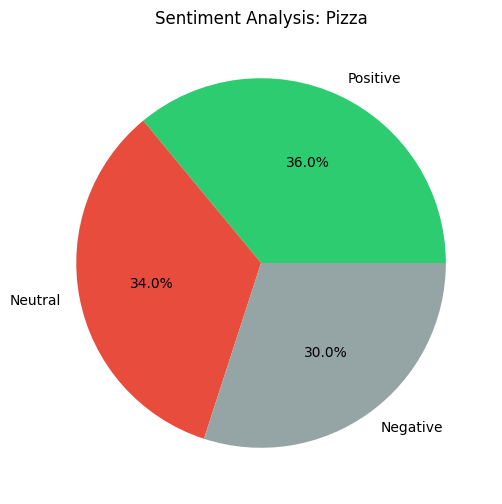


📊 SENTIMENT ANALYSIS REPORT
Topic: Pizza
Total tweets: 100
Most common sentiment: Positive

Results:
😊 Positive: 36 (36.0%)
😐 Neutral: 34 (34.0%)
😞 Negative: 30 (30.0%)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from textblob import TextBlob

def create_tweets(topic="pizza", num_tweets=100):

    positive = [f"I love {topic}! ", f"{topic} is amazing! ", f"Best {topic} ever! "]
    negative = [f"I hate {topic}. ", f"{topic} is terrible. ", f"Worst {topic} ever. "]
    neutral = [f"Just had {topic}.", f"Store sells {topic}.", f"People like {topic}."]

    all_tweets = positive + negative + neutral
    tweets = [random.choice(all_tweets) for _ in range(num_tweets)]

    return pd.DataFrame({'text': tweets, 'topic': topic})

def get_sentiment(text):
    """Return Positive, Negative, or Neutral"""
    polarity = TextBlob(text).sentiment.polarity

    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

def make_chart(data, topic):
    """Create a pie chart of sentiment"""
    counts = data['sentiment'].value_counts()
    colors = ['#2ecc71', '#e74c3c', '#95a5a6']

    plt.figure(figsize=(8, 6))
    plt.pie(counts.values, labels=counts.index, colors=colors, autopct='%1.1f%%')
    plt.title(f'Sentiment Analysis: {topic.title()}')
    plt.show()

    return counts

def create_report(data, counts, topic):
    """Create a simple report"""
    total = len(data)
    most_common = counts.index[0]

    report = f"""
📊 SENTIMENT ANALYSIS REPORT
Topic: {topic.title()}
Total tweets: {total}
Most common sentiment: {most_common}

Results:
"""
    for sentiment in counts.index:
        count = counts[sentiment]
        percent = (count/total)*100
        emoji = "😊" if sentiment=="Positive" else "😞" if sentiment=="Negative" else "😐"
        report += f"{emoji} {sentiment}: {count} ({percent:.1f}%)\n"

    return report

def analyze_sentiment(topic="coffee", num_tweets=100):
    """Run complete sentiment analysis"""

    print(f"🚀 Analyzing sentiment about: {topic}")

    # Create data
    data = create_tweets(topic, num_tweets)

    # Analyze sentiment
    data['sentiment'] = data['text'].apply(get_sentiment)

    # Show examples
    print("\n📝 Example tweets:")
    for i in range(3):
        tweet = data.iloc[i]
        print(f"{tweet['sentiment']}: {tweet['text']}")

    # Create chart
    print("\n📊 Creating chart...")
    counts = make_chart(data, topic)

    # Generate report
    report = create_report(data, counts, topic)
    print(report)

    return data
TOPIC = "pizza"
NUM_TWEETS = 100

# Run the analysis
results = analyze_sentiment(TOPIC, NUM_TWEETS)
